In [71]:
%pip install pandas numpy
%pip install scikit-learn
%pip install matplotlib seaborn 


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [73]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [74]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [75]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [76]:
df.drop(['id'],inplace=True,axis=1)

In [77]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [78]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [79]:
df['smoking_status'] = df['smoking_status'].replace({'Unknown': np.nan})
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [80]:
cat_cols = df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]
for col in cat_cols:
    df[col] = df[col].astype('category')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [81]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['bmi'] = imputer.fit_transform(df[['bmi']])
df['smoking_status'] = df['smoking_status'].fillna(df['smoking_status'].mode()[0])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [82]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [83]:
df_encoded

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,True,False,True,False,True,False,False,True,False,False
1,61.0,0,0,202.21,28.893237,1,False,False,True,False,False,True,False,False,True,False
2,80.0,0,1,105.92,32.500000,1,True,False,True,False,True,False,False,False,True,False
3,49.0,0,0,171.23,34.400000,1,False,False,True,False,True,False,False,True,False,True
4,79.0,1,0,174.12,24.000000,1,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,False,False,True,False,True,False,False,True,True,False
5106,81.0,0,0,125.20,40.000000,0,False,False,True,False,False,True,False,True,True,False
5107,35.0,0,0,82.99,30.600000,0,False,False,True,False,False,True,False,False,True,False
5108,51.0,0,0,166.29,25.600000,0,True,False,True,False,True,False,False,False,False,False


In [84]:
df_encoded.info()
df_encoded.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          5110 non-null   float64
 1   hypertension                 5110 non-null   int64  
 2   heart_disease                5110 non-null   int64  
 3   avg_glucose_level            5110 non-null   float64
 4   bmi                          5110 non-null   float64
 5   stroke                       5110 non-null   int64  
 6   gender_Male                  5110 non-null   bool   
 7   gender_Other                 5110 non-null   bool   
 8   ever_married_Yes             5110 non-null   bool   
 9   work_type_Never_worked       5110 non-null   bool   
 10  work_type_Private            5110 non-null   bool   
 11  work_type_Self-employed      5110 non-null   bool   
 12  work_type_children           5110 non-null   bool   
 13  Residence_type_Urb

(5110, 16)

In [87]:
X = df_encoded.drop('stroke', axis=1)
y = df_encoded['stroke']

In [86]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [89]:
from sklearn.model_selection import train_test_split
# First split: 80% train_val, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Second split: 75% train of train_val → 60% overall
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42
)


In [90]:
X_train.shape, X_val.shape, X_test.shape

((3066, 15), (1022, 15), (1022, 15))

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_val_scaled = scaler.transform(X_val)
x_test_scaled = scaler.transform(X_test)

In [92]:
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

scale_pos = y_train.value_counts()[0] / y_train.value_counts()[1]
xgb_model = XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.1, scale_pos_weight=scale_pos)

In [93]:
lr_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Rexon_Pambujya\\AppData\\Roaming\\Python\\Python313\\site-packages\\sklearn\\utils\\_repr_html\\estimator.js'

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Rexon_Pambujya\\AppData\\Roaming\\Python\\Python313\\site-packages\\sklearn\\utils\\_repr_html\\estimator.js'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [69]:
from sklearn.metrics import classification_report, roc_auc_score

def evaluate(model, X_val, y_val, model_name):
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1]
    
    print(f"\n📊 {model_name}")
    print(classification_report(y_val, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_val, y_proba))


In [70]:
evaluate(lr_model, x_val_scaled, y_val, "LogisticRegression")
evaluate(rf_model, X_val, y_val, "RandomForestClassifier")
evaluate(xgb_model, X_val, y_val, "XGBClassifier")


📊 LogisticRegression
              precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.14      0.82      0.24        50

    accuracy                           0.75      1022
   macro avg       0.57      0.78      0.55      1022
weighted avg       0.95      0.75      0.82      1022

ROC AUC Score: 0.8381687242798355

📊 RandomForestClassifier
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC Score: 0.7862448559670782

📊 XGBClassifier
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       972
           1       0.16      0.24      0.19        50

    accuracy                           0.90      

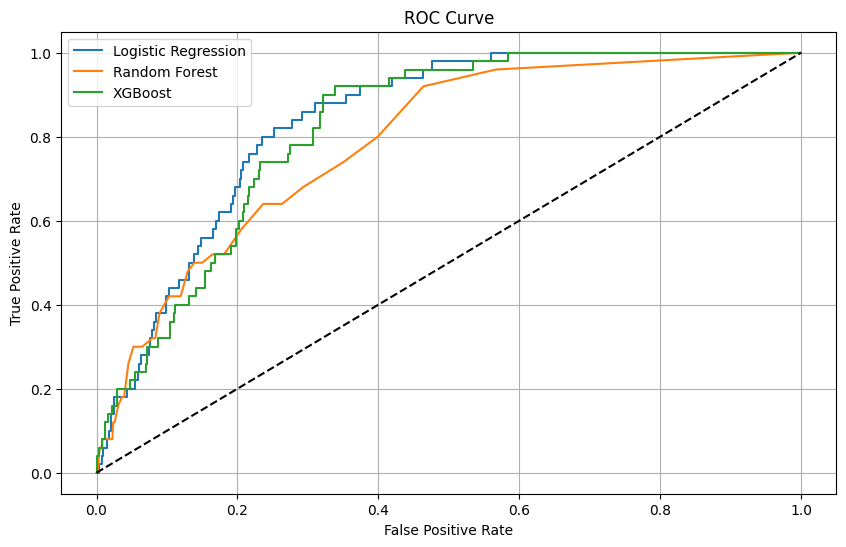

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

def plot_roc(models, X_vals, y_val):
    plt.figure(figsize=(10, 6))
    for name, model, X_v in models:
        y_score = model.predict_proba(X_v)[:, 1]
        fpr, tpr, _ = roc_curve(y_val, y_score)
        plt.plot(fpr, tpr, label=name)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_roc([
    ("Logistic Regression", lr_model, x_val_scaled),
    ("Random Forest", rf_model, X_val),
    ("XGBoost", xgb_model, X_val)
], X_val, y_val)
